In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

1) описать данные, в том числе полноту;

In [6]:
df=pd.read_csv('FilmTV_dataset.csv')

In [7]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46907 entries, 0 to 46906
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filmtv_ID   46907 non-null  int64  
 1   film_title  46907 non-null  object 
 2   year        46907 non-null  int64  
 3   genre       46736 non-null  object 
 4   duration    46907 non-null  int64  
 5   country     46868 non-null  object 
 6   director    46904 non-null  object 
 7   actors      46778 non-null  object 
 8   avg_vote    46907 non-null  float64
 9   votes       46907 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.6+ MB


Представленные данные не явялются полными. Столбец duration содержит пустые значения. 

**Рассчитать основные статистические характеристики: медиану, моду,
математическое ожидание, стандартное отклонение, дисперсию, минимум и
максимум, найти выбросы (если есть), размах для колонки duration;**


In [9]:
print('Медиана: ', statistics.median(df['duration']))

Медиана:  95


In [10]:
print('Значение моды: ', statistics.mode(duration))

Значение моды:  90


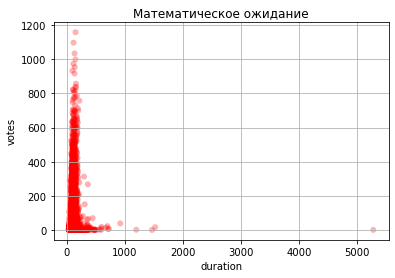

In [34]:
duration = df['duration']
votes = df['votes']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.title('Математическое ожидание')
plt.show()

In [13]:
print('Стандартное отклонение: ',statistics.pstdev(duration))

Стандартное отклонение:  34.95860443683266


In [39]:
print('Дисперсия: ',statistics.pvariance(duration))

Дисперсия:  1222.1040241709359


In [16]:
print('Минимум: ',min(duration))

Минимум:  40


In [17]:
print('Максимум: ',max(duration))

Максимум:  5280


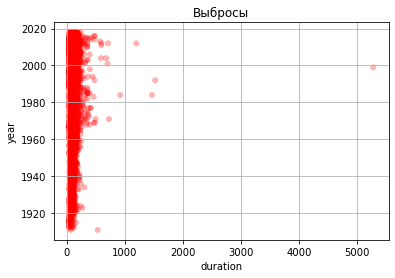

In [35]:
duration = df['duration']
year = df['year']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.title('Выбросы')
plt.show()

In [36]:
duration_range = max(duration) - min(duration)
print('Размах: ',duration_range)

Размах:  5240


**Построить диаграмму рассеяния и гистограмму признака duration,
сделать предположение о типе распределения;**


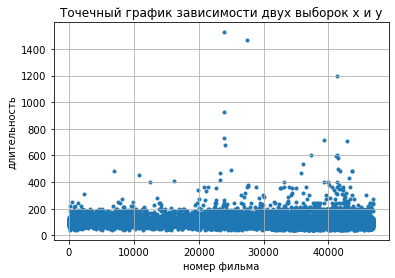

In [23]:
y = df.loc[df['duration'] < 5000, 'duration']
plt.xlabel('номер фильма')
plt.ylabel('длительность')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
x = [i for i in range(0, len(duration)-1)]
plt.scatter(x, y, marker='.')
plt.show()

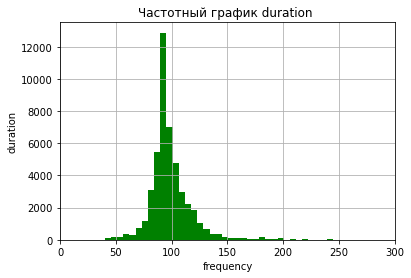

In [55]:
n, bins, patches = plt.hist(duration[duration < 600], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('duration')
plt.xlim([0, 300])
plt.title('Частотный график duration ')
plt.grid(True)
plt.show()

Данное распределение похоже на нормальное распределение.

**Произести отсев аномальных значений**


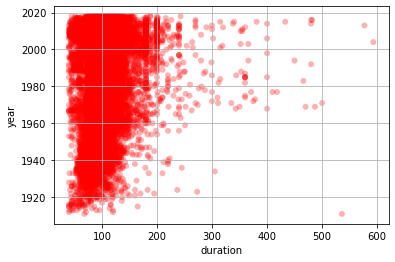

In [29]:
duration[duration>600]
duration_new = duration[duration<600]
year_new = year[duration<600]

fig, ax = plt.subplots()
ax.scatter(duration_new, year_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

**Определить количество отсеянных значений**


In [30]:
print('Количество отсеянных значений',len(duration[duration>600]))

Количество отсеянных значений 9


**Построить диаграмму рассеяния и гистограмму признака duration
после отсева аномалий, сделать выводы;**

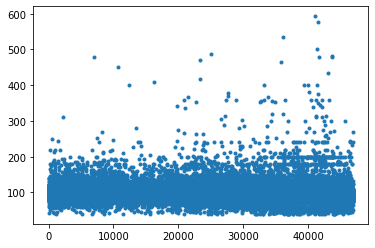

In [31]:
len_column = len(duration_new) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, duration_new, marker='.')

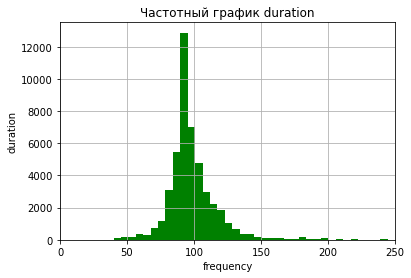

In [32]:
n, bins, patches = plt.hist(duration_new, 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('duration')
plt.xlim([0, 250])
plt.title('Частотный график duration')
plt.grid(True)
plt.show()

**Напишите код для моделирования 10 подбрасываний игрального
кубика. Начертите диаграму histogram. Какое это распределение?**


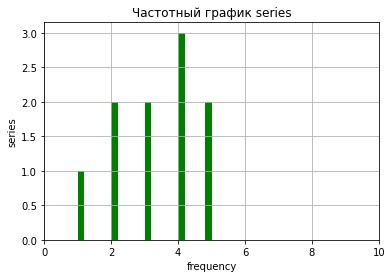

In [37]:
import random

a = []
for i in range(10):
    a.append(random.randint(1, 6))
series = pd.Series(a)
n, bins, patches = plt.hist(series, 20, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('series')
plt.xlim([0, 10])
plt.title('Частотный график series')
plt.grid(True)
plt.show()

**смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите
диаграму histogram. Почему график изменился? Почему можно применить
центральную предельную теорему?**

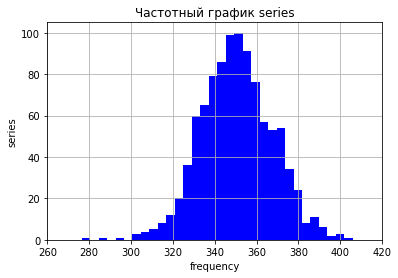

In [53]:

b = []

for i in range(1000):
    sum = 0
    for i in range(100):
        sum += random.randint(1, 6)
    b.append(sum)

for i in range(100):
    b.append(random.randint(1, 6))

series_1000 = pd.Series(b)

n, bins, patches = plt.hist(series_1000, 100, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('series')
plt.xlim([260, 420])
plt.title('Частотный график series')
plt.grid(True)
plt.show()

Данное распределение похоже на нормальное распределение. Данное моделирование подтверждает центрально-предельную теормему: сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.